### Import Library Needed

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Convert to GrayScale Function

In [2]:
def Grayscale(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image

### Blurring Image using Gaussian Function

In [3]:
def GaussianBlur(image):
    image = cv2.GaussianBlur(image, (3, 3), 0)
    return image

### Filter the Image Using Sobel Function

In [4]:
def SobelFilter(image):
    image = Grayscale(GaussianBlur(image))
    plt.imshow(image, cmap = plt.get_cmap('gray'))
    plt.title('Gaussian Blur Result')
    plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
    plt.show()
    convolved = np.zeros(image.shape)
    G_x = np.zeros(image.shape)
    G_y = np.zeros(image.shape)
    size = image.shape
    kernel_x = np.array(([-1, 0, 1], [-2, 0, 2], [-1, 0, 1]))
    kernel_y = np.array(([-1, -2, -1], [0, 0, 0], [1, 2, 1]))
    for i in range(1, size[0] - 1):
        for j in range(1, size[1] - 1):
            G_x[i, j] = np.sum(np.multiply(image[i - 1 : i + 2, j - 1 : j + 2], kernel_x))
            G_y[i, j] = np.sum(np.multiply(image[i - 1 : i + 2, j - 1 : j + 2], kernel_y))
    
    convolved = np.sqrt(np.square(G_x) + np.square(G_y))
    convolved = np.multiply(convolved, 255.0 / convolved.max())

    angles = np.rad2deg(np.arctan2(G_y, G_x))
    angles[angles < 0] += 180
    convolved = convolved.astype('uint8')
    return convolved, angles

### Apply non_maximum_suppresion Function

In [5]:
def non_maximum_suppression(image, angles):
    size = image.shape
    suppressed = np.zeros(size)
    for i in range(1, size[0] - 1):
        for j in range(1, size[1] - 1):
            if (0 <= angles[i, j] < 22.5) or (157.5 <= angles[i, j] <= 180):
                value_to_compare = max(image[i, j - 1], image[i, j + 1])
            elif (22.5 <= angles[i, j] < 67.5):
                value_to_compare = max(image[i - 1, j - 1], image[i + 1, j + 1])
            elif (67.5 <= angles[i, j] < 112.5):
                value_to_compare = max(image[i - 1, j], image[i + 1, j])
            else:
                value_to_compare = max(image[i + 1, j - 1], image[i - 1, j + 1])
            
            if image[i, j] >= value_to_compare:
                suppressed[i, j] = image[i, j]
    suppressed = np.multiply(suppressed, 255.0 / suppressed.max())
    return suppressed

### Apply Hysteresis Thresholding Function

In [6]:
def double_threshold_hysteresis(image, low, high):
    weak = 50
    strong = 255
    size = image.shape
    result = np.zeros(size)
    weak_x, weak_y = np.where((image > low) & (image <= high))
    strong_x, strong_y = np.where(image >= high)
    result[strong_x, strong_y] = strong
    result[weak_x, weak_y] = weak
    dx = np.array((-1, -1, 0, 1, 1, 1, 0, -1))
    dy = np.array((0, 1, 1, 1, 0, -1, -1, -1))
    size = image.shape
    
    while len(strong_x):
        x = strong_x[0]
        y = strong_y[0]
        strong_x = np.delete(strong_x, 0)
        strong_y = np.delete(strong_y, 0)
        for direction in range(len(dx)):
            new_x = x + dx[direction]
            new_y = y + dy[direction]
            if((new_x >= 0 & new_x < size[0] & new_y >= 0 & new_y < size[1]) and (result[new_x, new_y]  == weak)):
                result[new_x, new_y] = strong
                np.append(strong_x, new_x)
                np.append(strong_y, new_y)
    result[result != strong] = 0
    return result

### Function to do All the Step Above

In [7]:
def Canny(image, low, high):
    image, angles = SobelFilter(image)
    plt.imshow(image, cmap = plt.get_cmap('gray'))
    plt.title('Sobel Filter Result')
    plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
    plt.show()
    image = non_maximum_suppression(image, angles)
    plt.imshow(image, cmap = plt.get_cmap('gray'))
    plt.title('Non Maximum Suppresion Result')
    plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
    plt.show()
    gradient = np.copy(image)
    image = double_threshold_hysteresis(image, low, high)
    return image, gradient

### Run the Code to view the result of Canny Edge Detection

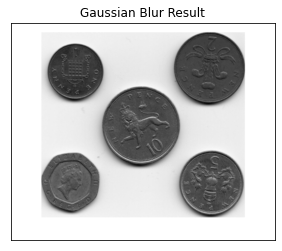

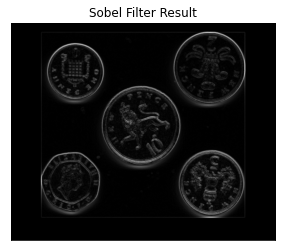

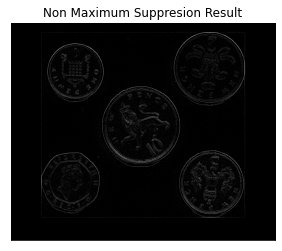

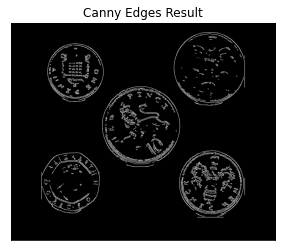

In [8]:
image = cv2.imread("DetectAndMeasureCircularObjectsThingSpeakExample_01.png")
image, gradient = Canny(image, 0, 50)
plt.imshow(image, cmap = plt.get_cmap('gray'))
plt.title('Canny Edges Result')
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()